In [1176]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [1177]:
#import data
train = pd.read_csv('Train.csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [1178]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [1179]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [1180]:
train.shape

(2154048, 19)

In [1181]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
user_id           object
REGION            object
TENURE            object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG               object
REGULARITY        int64
TOP_PACK          object
FREQ_TOP_PACK     float64
CHURN             int64
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [1182]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [1183]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [1184]:
test.shape

(380127, 18)

In [1185]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
user_id           380127 non-null object
REGION            230399 non-null object
TENURE            380127 non-null object
MONTANT           247072 non-null float64
FREQUENCE_RECH    247072 non-null float64
REVENUE           252754 non-null float64
ARPU_SEGMENT      252754 non-null float64
FREQUENCE         252754 non-null float64
DATA_VOLUME       193087 non-null float64
ON_NET            241613 non-null float64
ORANGE            222897 non-null float64
TIGO              153126 non-null float64
ZONE1             29861 non-null float64
ZONE2             24076 non-null float64
MRG               380127 non-null object
REGULARITY        380127 non-null int64
TOP_PACK          221348 non-null object
FREQ_TOP_PACK     221348 non-null float64
dtypes: float64(12), int64(1), object(5)
memory usage: 52.2+ MB


In [1186]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [1187]:
submission.shape

(380127, 2)

In [1188]:
#Check how many levels are involved in each of the categorical features (object)

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

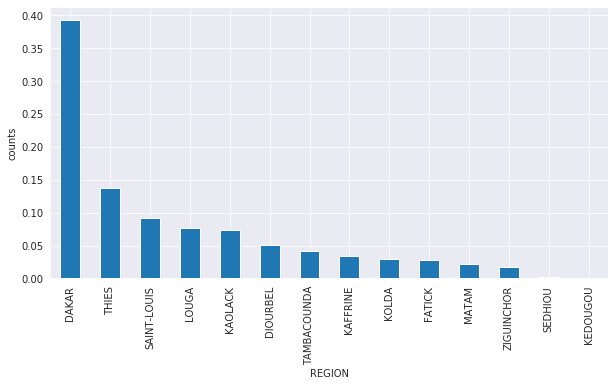

In [1189]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

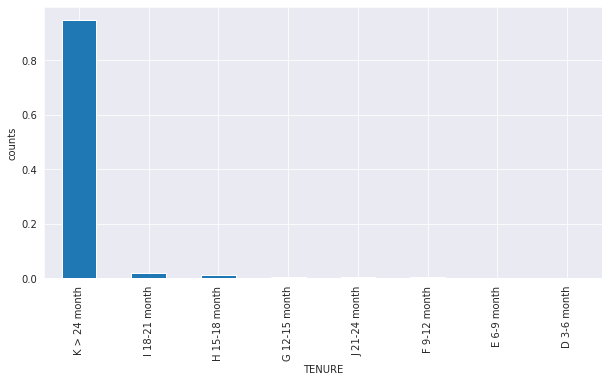

In [1190]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

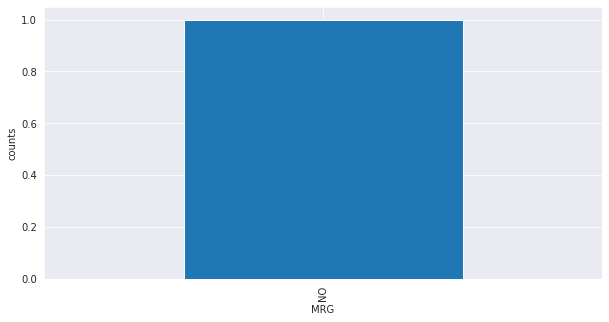

In [1191]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d                  317802
On net 200F=Unlimited _call24H         152295
Data:490F=1GB,7d                       115180
Data: 100 F=40MB,24H                    84649
Mixt 250F=Unlimited_call24H             67512
                                        ...  
NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE         1
CVM_150F_unlimited                          1
301765007                                   1
YMGX on-net 100=700F, 24H                   1
APANews_monthly                             1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

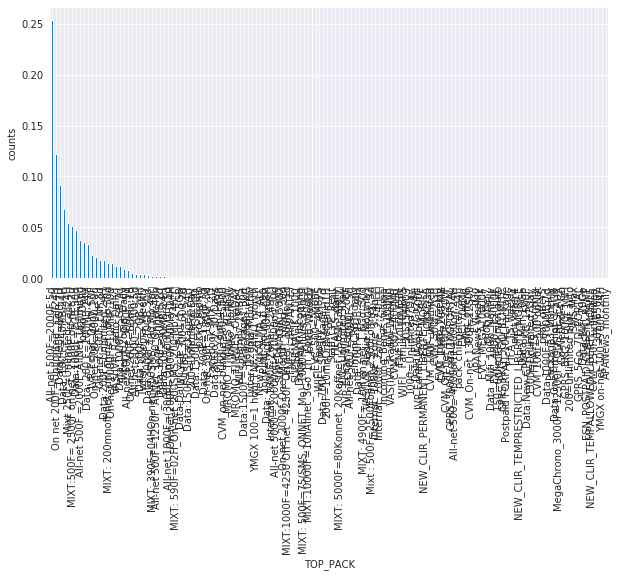

In [1192]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

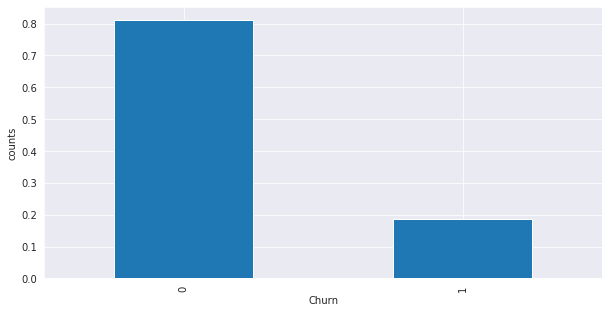

In [1193]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [1194]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [1195]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [1196]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [1197]:
train = pd.get_dummies(train, columns = ['REGION'], prefix = ['REGION'])
train = pd.get_dummies(train, columns = ['MRG'], prefix = ['MRG'])
train.head(5)

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,MRG_NO
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,...,0,0,0,0,0,0,0,0,0,1
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,...,0,0,0,0,0,0,0,0,0,1
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,...,0,0,0,0,0,0,0,0,0,1
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,...,0,0,0,0,0,0,0,0,0,1


In [1198]:
test = pd.get_dummies(test, columns = ['REGION'], prefix = ['REGION'])
test = pd.get_dummies(test, columns = ['MRG'], prefix = ['MRG'])
test.head(5)

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,MRG_NO
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,...,0,0,0,0,0,0,0,1,0,1
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,1
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [869]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [1199]:
#train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns
train.drop(columns=['TOP_PACK'], inplace=True) #drop these columns

In [1200]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,MRG_NO
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,...,0,0,0,0,0,0,0,0,0,1
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,...,0,0,0,0,0,0,0,0,0,1
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,...,0,0,0,0,0,0,0,0,0,1
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,...,0,0,0,0,0,0,0,0,0,1


In [1202]:
#test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)
test.drop(columns=['TOP_PACK'], inplace=True)

In [1203]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,MRG_NO
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,...,0,0,0,0,0,0,0,1,0,1
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,1
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [1204]:
#Fill NAs for train data

In [1205]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [1206]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,MRG_NO
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,...,0,0,0,0,0,0,0,0,0,1
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,...,0,0,0,0,0,0,0,0,0,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,46.000000,...,0,0,0,0,0,0,0,0,0,1
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,102.000000,...,0,0,0,0,0,0,0,0,0,1
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,24.000000,...,0,0,0,0,0,0,0,0,0,1


In [1207]:
train.isnull().sum()

user_id               0
TENURE                0
MONTANT               0
FREQUENCE_RECH        0
REVENUE               0
ARPU_SEGMENT          0
FREQUENCE             0
DATA_VOLUME           0
ON_NET                0
ORANGE                0
TIGO                  0
ZONE1                 0
ZONE2                 0
REGULARITY            0
FREQ_TOP_PACK         0
CHURN                 0
REGION_DAKAR          0
REGION_DIOURBEL       0
REGION_FATICK         0
REGION_KAFFRINE       0
REGION_KAOLACK        0
REGION_KEDOUGOU       0
REGION_KOLDA          0
REGION_LOUGA          0
REGION_MATAM          0
REGION_SAINT-LOUIS    0
REGION_SEDHIOU        0
REGION_TAMBACOUNDA    0
REGION_THIES          0
REGION_ZIGUINCHOR     0
MRG_NO                0
dtype: int64

In [1208]:
#Fill NAs for test data

In [1209]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [1210]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,MRG_NO
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,...,0,0,0,0,0,0,0,1,0,1
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,...,0,0,0,0,0,0,0,0,0,1
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,...,0,0,0,0,0,0,0,0,0,1
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,...,0,0,0,0,0,0,0,0,0,1


In [1211]:
test.isnull().sum()

user_id               0
TENURE                0
MONTANT               0
FREQUENCE_RECH        0
REVENUE               0
ARPU_SEGMENT          0
FREQUENCE             0
DATA_VOLUME           0
ON_NET                0
ORANGE                0
TIGO                  0
ZONE1                 0
ZONE2                 0
REGULARITY            0
FREQ_TOP_PACK         0
REGION_DAKAR          0
REGION_DIOURBEL       0
REGION_FATICK         0
REGION_KAFFRINE       0
REGION_KAOLACK        0
REGION_KEDOUGOU       0
REGION_KOLDA          0
REGION_LOUGA          0
REGION_MATAM          0
REGION_SAINT-LOUIS    0
REGION_SEDHIOU        0
REGION_TAMBACOUNDA    0
REGION_THIES          0
REGION_ZIGUINCHOR     0
MRG_NO                0
dtype: int64

## Machine Learning

In [1212]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [1213]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(2154048, 29)
(2154048,)
(380127, 29)


In [1214]:
#Split training data into train and test split

In [1215]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1507833, 29)
(1507833,)
(646215, 29)
(646215,)


In [1216]:
#Further split X_train and y_train into train and validation sets

In [1217]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=42)

In [1218]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(1055483, 29)
(1055483,)
+++++++
test
(646215, 29)
(646215,)
+++++++
validation
(452350, 29)
(452350,)


In [1219]:
#Standardize numeric columns

In [1144]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [1145]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

In [1146]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [1147]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
1334185,K > 24 month,-0.935273,-0.983798,-0.909894,-0.909728,-1.084048,-0.24391,-0.398550,0.000270,-0.000252,-0.000654,0.00008,-1.033327,-0.883943
407893,K > 24 month,0.249062,2.098700,0.314244,0.314241,1.838648,0.49963,-0.399993,-0.573683,-0.000252,-0.000654,0.00008,1.075776,2.749029
689123,K > 24 month,0.000285,-0.000283,0.000123,0.000123,-0.000300,0.00054,0.000846,0.000270,-0.000252,-0.000654,0.00008,-1.033327,-0.000013
1239915,K > 24 month,0.000285,-0.000283,0.000123,0.000123,-0.000300,0.00054,0.000846,0.000270,-0.000252,-0.000654,0.00008,-1.167950,-0.000013
1569911,K > 24 month,0.000285,-0.000283,0.000123,0.000123,-0.000300,0.00054,0.000846,0.000270,-0.000252,-0.000654,0.00008,-0.988452,-0.000013


In [1148]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [1149]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
566939,K > 24 month,-0.233445,-0.329935,-0.224658,-0.224490,0.001525,-0.350667,0.053260,0.232478,-0.000252,-0.000654,0.00008,-0.360209,-0.670239
620796,K > 24 month,-0.794907,-0.890389,-0.772813,-0.772989,-1.000542,0.000540,-0.314828,-0.586379,-0.000252,-0.000654,0.00008,-0.494832,-0.883943
299703,K > 24 month,0.000285,-0.000283,0.000123,0.000123,-0.000300,0.000540,0.000846,0.000270,-0.000252,-0.000654,0.00008,-1.167950,-0.000013
1051494,K > 24 month,-0.040442,0.323929,-0.061702,-0.061534,0.335547,0.000540,1.739247,-0.046822,-0.000252,-0.000654,0.00008,0.986027,-0.242831
527353,K > 24 month,-0.935273,-0.983798,-0.875795,-0.875800,-0.917037,-0.347432,-0.389889,-0.605422,-0.000252,-0.000654,0.00008,0.492407,-0.883943


In [1150]:
test[num_cols] = scaler.transform(test[num_cols])

In [1151]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,K > 24 month,-0.093079,-0.610162,-0.087405,-0.087237,-0.750025,-0.001584,0.145643,-0.535597,-0.448326,-0.001136,0.012026,0.627031,-0.456535
1,I 18-21 month,-0.917727,-0.890389,-0.888304,-0.888137,-0.917037,-0.309342,0.002459,-0.605422,-0.001666,-0.001136,0.012026,0.582156,-0.883943
2,K > 24 month,-0.391356,1.258019,-0.361568,-0.361743,1.003592,0.395378,-0.399993,-0.592726,-0.448326,-0.001136,0.012026,1.300149,1.359951
3,K > 24 month,-0.000971,-0.001149,-0.001784,-0.001784,-0.001985,-0.001584,0.002459,-0.001163,-0.001666,-0.001136,0.012026,-0.853829,-0.001176
4,K > 24 month,-0.000971,-0.001149,-0.001784,-0.001784,-0.001985,-0.001584,0.002459,-0.001163,-0.001666,-0.001136,0.012026,-0.808954,-0.001176


In [1152]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [1153]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
1861439,K > 24 month,6.258464,5.928470,6.258614,6.258793,4.844850,-0.350772,0.731697,17.879157,-0.497812,-0.000654,0.00008,1.524521,7.877930
1401476,K > 24 month,0.547339,1.164610,0.614967,0.614964,2.005660,0.328903,0.000846,0.016655,-0.000252,-0.000654,0.00008,1.255274,-0.135978
659519,K > 24 month,1.661491,4.060290,1.713847,1.714018,3.926289,-0.350772,5.941223,0.492735,-0.052441,-0.000654,0.00008,1.524521,2.428472
364803,K > 24 month,-0.847544,-0.890389,-0.824390,-0.824394,-1.000542,0.000540,-0.395663,-0.592726,-0.000252,-0.000654,0.00008,0.357784,-0.883943
541290,K > 24 month,0.047287,-0.143116,-0.001729,-0.001904,-0.332497,-0.350772,-0.296062,0.378476,-0.000252,-0.000654,0.00008,0.896278,-0.135978


In [1154]:
#Encode the TENURE column

In [1220]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [1221]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [1222]:
X_val['TENURE'] = encoder.transform(X_val["TENURE"])

In [1223]:
test['TENURE'] = encoder.transform(test["TENURE"])

In [1224]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,MRG_NO
1334185,7,200.000000,1.00000,200.000000,67.000000,1.000000,1024.000000,1.00000,95.418711,23.109253,...,0,0,0,0,0,0,0,0,0,1
407893,7,6950.000000,34.00000,7344.000000,2448.000000,36.000000,8149.000000,0.00000,5.000000,23.109253,...,0,0,0,0,0,0,0,1,0,1
689123,7,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,...,0,0,1,0,0,0,0,0,0,1
1239915,7,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,...,0,0,0,0,0,0,0,0,0,1
1569911,7,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,...,0,0,0,0,0,0,0,0,0,1


In [1225]:
#rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
#                              n_jobs=-1,
#                              max_depth=7,
#                              n_estimators=200,
#                              random_state=1,
#                              verbose=True)


In [1241]:
rand = XGBClassifier(
    learning_rate =0.05,
    n_estimators=1000,
    max_depth=6,
    gamma=1,
    reg_alpha=0.005,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    tree_method="hist",
    scale_pos_weight=1,
    seed=27)

In [1242]:
#Fit model on data
randmodel = rand.fit(X_train,y_train)

In [1243]:
#Predict on the X_test data 
randpred = randmodel.predict(X_test)

In [1244]:
print("Acuracy")
accuracy_score(y_test, randpred)

Acuracy


0.8800940863334958

In [1245]:
print("Recall")
recall_score(y_test, randpred)

Recall


0.6544751636249732

In [1246]:
print("F1 Score")
f1_score(y_test, randpred)

F1 Score


0.6720614189157733

In [1247]:
confusion_matrix(y_test, randpred)

array([[489333,  35568],
       [ 41917,  79397]])

In [1248]:
# Making a submissio

In [1249]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,1
4,0000bae5480628cf8fe51ad84bcb39772fc79224,1


In [1250]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,MRG_NO
0,7,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,5.000000,...,0,0,0,0,0,0,0,1,0,1
1,5,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,23.052088,...,0,0,0,0,0,0,0,0,0,1
2,7,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,5.000000,...,0,0,0,0,0,0,0,0,0,1
3,7,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,...,0,0,0,0,0,0,0,0,0,1
4,7,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,...,0,0,0,0,0,0,0,0,0,1


In [1251]:
subpred = randmodel.predict(test)

In [1252]:
subpred

array([0, 0, 0, ..., 0, 0, 0])

In [1253]:
submission["CHURN"] = subpred

In [1254]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [1255]:
submission.to_csv('sub1.csv', index=False)

In [1101]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class 
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go


### Good Luck !!!